# 08 Local Active Subspaces


In [24]:
import numpy as np
import matplotlib.pyplot as plt

from athena import Normalizer, TopDownHierarchical, KMeansAS, KMedoidsAS, ClassifyAS, plot_scores

In [25]:
def quartic_2d(X, n):
    # Unnormalize inputs
    x = n.inverse_transform(X)

    f = x[:, 0]**4 - x[:, 1]**4
    df = np.empty(x.shape)
    df[:, 0] = 4.0 * x[:, 0]**3
    df[:, 1] = -4.0 * x[:, 1]**3
    return f, df
    
n_params = 2
n_samples = 400
n_samples_test = 600

lb = np.array(n_params * [0])
ub = np.array(n_params * [1])

scaler = Normalizer(lb, ub)
real_inputs = np.random.uniform(scaler.lb, scaler.ub, (n_samples, n_params))
inputs = scaler.fit_transform(real_inputs)


# output values (f) and gradients (df)
outputs, gradients = quartic_2d(inputs, scaler)

real_inputs_test = np.random.uniform(scaler.lb, scaler.ub,
                                     (n_samples_test, n_params))
inputs_test = scaler.fit_transform(real_inputs_test)
outputs_test = quartic_2d(inputs_test, scaler)[0]

In [38]:
config = {
    'inputs_test': inputs_test,
    'outputs_test': outputs_test,
    'inputs': inputs,
    'outputs': outputs,
    'gradients': gradients,
    'method': 'kmedoids',
    'n_clusters': 3,
    'as_dim': 1,
    'random_state': 0,
    'max_clusters': 3,
    'max_red_dim': 2,
    'max_children': 3,
    'min_children': 3,
    'min_local': 10,
    'dim_cut': 0.7,
    'normalization': 'uniform',
    'metric': 'as',
    'refinement_criterion': 'force',
    'as_dim_criterion': 'residual',
    'minimum_score': 0.98,
    'score_tolerance': 0.99,
    'max_dim_refine_further':2,
    'verbose': True,
}

score is: 0.98  r_dim is:  1  state is:  4  n_elem :  127
score is: 0.99  r_dim is:  1  state is:  2  n_elem :  116
score is: 0.52  r_dim is:  1  state is:  4  n_elem :  157
Hierarchical top-down clustering completed with states
7  :  node not refined
n_leaves: 3
Test score: [0.72700559 0.96707648 0.14932069 0.04241945]
Start refining: increasing the as dimension when possible.
score is: 0.98  r_dim is:  1  state is:  4  n_elem :  127
score is: 0.99  r_dim is:  1  state is:  2  n_elem :  116
score is: 1.00  r_dim is:  2  state is:  4  n_elem :  157
Finished increasing as dimension when possible.
n_leaves:  3
Test score:  [0.72700559 0.99659643 0.14932069 0.01123917]


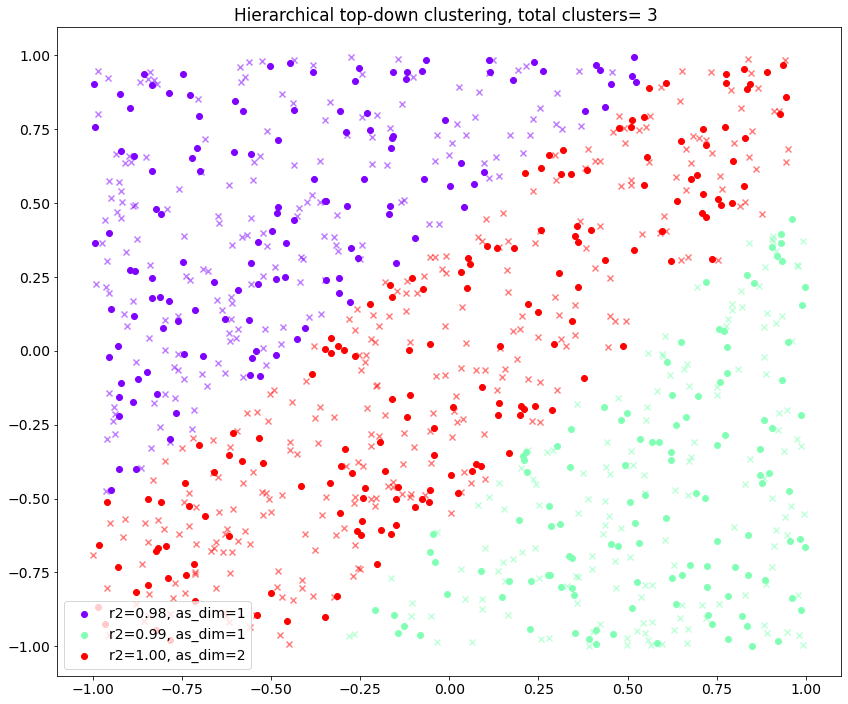

In [39]:
# TopDownHierarchical clusters
cluster_as = TopDownHierarchical(config=config)
cluster_as.fit()
cluster_as.plot_clusters(with_test=True)

Number of components:  3


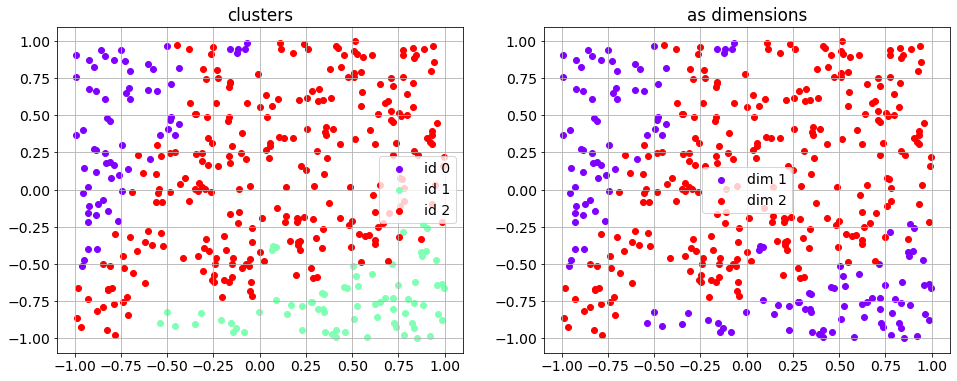

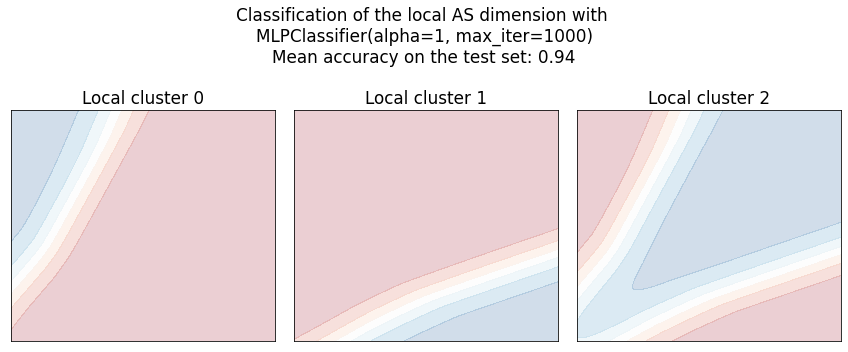

0.9375

In [28]:
agg = ClassifyAS(inputs,
                 gradients,
                 n_neighbours=6,
                 threshold=0.9999,
                 neighbour_resampling=5)
n_c, labels = agg.fit()
print("Number of components: ", n_c)
agg.plot()
score = agg.plot_decision_boundaries()
print("Classification error on train set {}".format(score))

Local AS with 2 clusters
Local AS with 3 clusters
Local AS with 4 clusters
Local AS with 5 clusters
Local AS with 6 clusters
Local AS with 7 clusters
Clustering with kmeans method
r2_local = [0.91072164 0.97611853 0.98535938 0.98640842 0.98599967 0.99401561]
mae_local = [0.06498396 0.02762188 0.02322006 0.02083355 0.02043259 0.01466178]


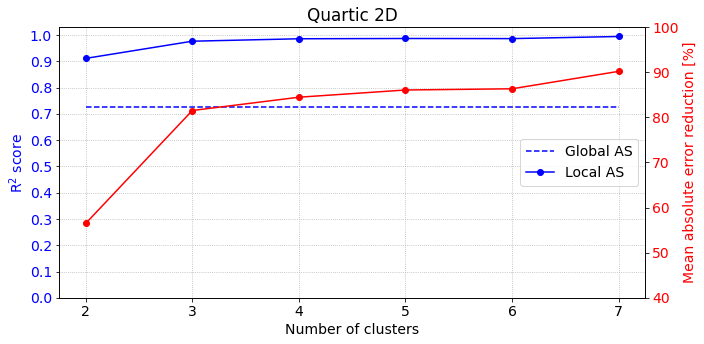

In [29]:
def plot_scores_(possible_clusters, config):
    """
    method='kmeans' or 'kmedoids' or 'divisive'
    """
    scores = []
    for n_clusters in possible_clusters:
        if config['method'] == 'kmeans':
            print("Local AS with {} clusters".format(n_clusters))
            config['n_clusters'] = n_clusters
            cluster_as = KMeansAS(config=config)
        elif config['method'] == 'kmedoids':
            print("Local AS with {} clusters".format(n_clusters))
            config['n_clusters'] = n_clusters
            cluster_as = KMedoidsAS(config=config)
        elif config['method'] == 'top-down':
            config['max_clusters'] = n_clusters
            config['min_children'] = n_clusters
            config['max_children'] = n_clusters
            cluster_as = TopDownHierarchical(config=config)
        cluster_as.fit()
        score = cluster_as.compute_scores(inputs_test, outputs_test)
        scores.append(score)
    scores = np.asarray(scores)
    print("Clustering with {} method".format(config['method']))
    print('r2_local = {}'.format(scores[:, 1]))
    print('mae_local = {}'.format(scores[:, 3]))
    plot_scores(possible_clusters, scores, plot_config)

plot_config = {
    'figsize': (10, 5),
    'title': 'Quartic 2D',
    'mae_bottom': 40,
    'mae_top': 100,
    'r2_bottom': 0.67,
    'r2_top': 1.03,
    'loc': 7,
    'main': 'r2',
}

# convergence study
cl_min, cl_max = 2, 8
possible_clusters = np.arange(cl_min, cl_max, 1)

# k-means
config['method'] = 'kmeans'
plot_config['filename'] = 'quartic_2d_r2_kmeans_{}_{}.pdf'.format(cl_min, cl_max)
plot_scores_(possible_clusters, config)

Local AS with 2 clusters
Local AS with 3 clusters
Local AS with 4 clusters
Local AS with 5 clusters
Local AS with 6 clusters
Local AS with 7 clusters
Clustering with kmedoids method
r2_local = [0.96248537 0.96711886 0.9878222  0.99229847 0.99599372 0.99582734]
mae_local = [0.04528624 0.04230666 0.02148458 0.01595498 0.01170413 0.01098669]


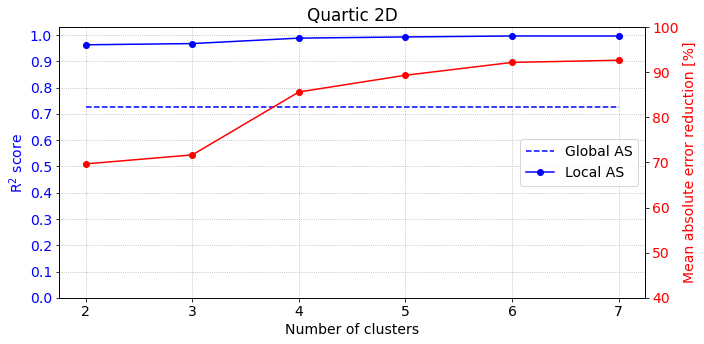

In [30]:
# k-medoids
config['method'] = 'kmedoids'
plot_config['filename'] = 'quartic_2d_r2_kmedoids_{}_{}.pdf'.format(cl_min, cl_max)
plot_scores_(possible_clusters, config)

score is: 0.92  r_dim is:  1  state is:  4  n_elem :  210
score is: 0.95  r_dim is:  1  state is:  4  n_elem :  190
Hierarchical top-down clustering completed with states
7  :  node not refined
n_leaves: 2
Test score: [0.72700559 0.96245631 0.14932069 0.04516917]
score is: 0.98  r_dim is:  1  state is:  4  n_elem :  127
score is: 0.99  r_dim is:  1  state is:  2  n_elem :  116
score is: 0.52  r_dim is:  1  state is:  4  n_elem :  157
Hierarchical top-down clustering completed with states
7  :  node not refined
n_leaves: 3
Test score: [0.72700559 0.96707648 0.14932069 0.04241945]
score is: 0.99  r_dim is:  1  state is:  2  n_elem :  101
score is: 0.93  r_dim is:  1  state is:  4  n_elem :  81
score is: 0.98  r_dim is:  1  state is:  4  n_elem :  97
score is: 1.00  r_dim is:  1  state is:  2  n_elem :  121
Hierarchical top-down clustering completed with states
7  :  node not refined
n_leaves: 4
Test score: [0.72700559 0.98730213 0.14932069 0.02145131]
score is: 1.00  r_dim is:  1  state 

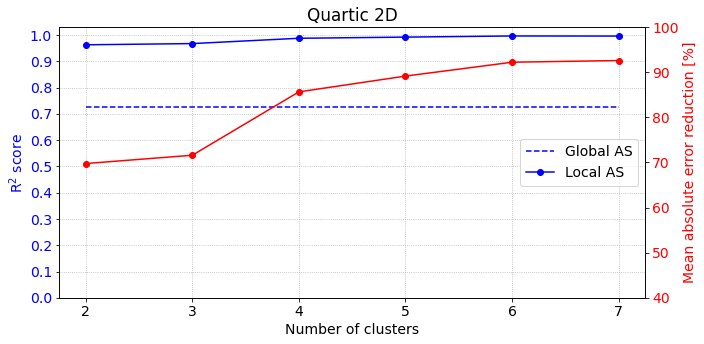

In [40]:
# top-down clustering
config['method'] = 'top-down'
config['minimum_score'] = None
config['max_red_dim'] = 1
plot_config['filename'] = 'quartic_2d_r2_top-down_{}_{}.pdf'.format(cl_min, cl_max)
plot_scores_(possible_clusters, config)